In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
display(digits.target)
display(digits.data)

array([0, 1, 2, ..., 8, 9, 8])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
y = digits.target == 9
display(y)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

array([False, False, False, ..., False,  True, False])

In [11]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
np.unique(pred_most_frequent)

array([False])

In [18]:
print("Test score: {:.3f}".format(dummy_majority.score(X_test, y_test)))

Test score: 0.896


In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [19]:
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Test score: 0.918


In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, solver = 'newton-cg').fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [26]:
print("logreg score: {:.3f}".format(logreg.score(X_test, y_test)))

logreg score: 0.984


In [ ]:
from sklearn.metrics import confusion_matrix

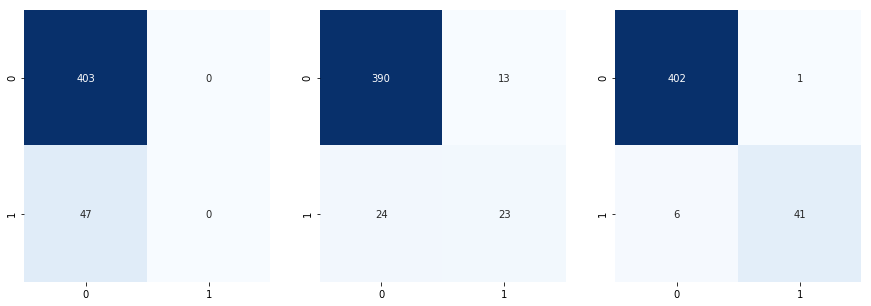

In [28]:
fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test,pred_most_frequent),annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test,pred_tree),annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test,pred_logreg),annot=True, fmt='g', cbar=None,cmap="Blues");

In [ ]:
from sklearn.metrics import f1_score

In [30]:
f1_score(y_test, pred_most_frequent), f1_score(y_test, pred_tree), f1_score(y_test, pred_logreg)

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.0, 0.5542168674698795, 0.9213483146067415)

In [ ]:
from sklearn.metrics import classification_report

In [33]:
print('--------- Дерево ------------\n', 
      classification_report(y_test, pred_tree,
                            target_names=["НЕ девять", "Девять"]), 
      '\n --------- Лог. регрессия ------------\n', 
      classification_report(y_test, pred_logreg,
                            target_names=["НЕ девять", "Девять"]))

--------- Дерево ------------
               precision    recall  f1-score   support

   НЕ девять       0.94      0.97      0.95       403
      Девять       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450
 
 --------- Лог. регрессия ------------
               precision    recall  f1-score   support

   НЕ девять       0.99      1.00      0.99       403
      Девять       0.98      0.87      0.92        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [36]:
from sklearn.metrics import precision_recall_curve # Кривая точность-полнота

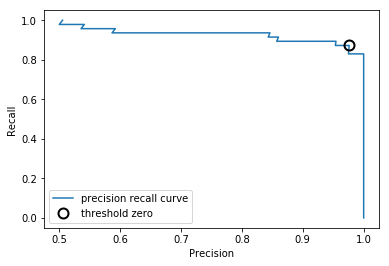

In [40]:
reg = LogisticRegression(C=0.1, solver = 'newton-cg').fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, reg.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds)) # find threshold closest to zero

plt.plot(precision, recall, label="precision recall curve")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best");

In [43]:
from sklearn.metrics import roc_curve

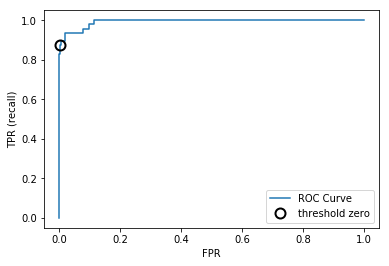

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, reg.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds)) # find threshold closest to zero

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4);

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.10  accuracy = 0.90  AUC = 0.96
gamma = 0.01  accuracy = 0.90  AUC = 1.00


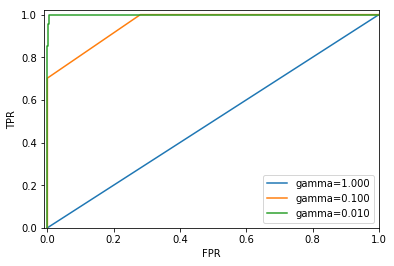

In [47]:
for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best");